In [1]:
using DynamicalSystems,  DifferentialEquations, OrdinaryDiffEq

using StaticArrays

using SciPy
using Statistics
using CairoMakie

# using InteractiveDynamics, GLMakie

In [2]:
function sigma(x)
    return @fastmath 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
end

function HR(u, p, t)
        
    a, b, c, d, s, xr, r,  I, vs, k1, k2, el_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - k1 * ( x1 - vs ) * sigma(x2) + el_link * ( x2 - x1 )
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - k2 * ( x2 - vs ) * sigma(x1) + el_link * ( x1 - x2 )
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )
    return SVector(du1, du2, du3,
                    du4, du5, du6)
end

function error_synch(x, y)
            nt = 10000
            error = ( 1 / ( 2 * nt ) ) * norm(x[1:nt] - y[1:nt])
end

function projection(x, y, z, ts, te,
                    xlabel, ylabel, zlabel, resolution = (700, 700), title = "Projection",  titlesize = 15)
    
    fig = Figure(resolution = (700, 700))
    
    ax = Axis3(fig[1,1]; xlabel = xlabel, ylabel = ylabel, zlabel = zlabel, 
    title = title, titlesize = titlesize)
    lines!(ax, x[ts:te], y[ts:te], z[ts:te], linewidth = 0.9, color = "blue")
        
    fig
end

function projection(x, y, ts, te,
                    xlabel, ylabel, resolution = (700, 700), title = "Projection",  titlesize = 15)
    
    fig = Figure(resolution = (700, 700))
    
    ax = Axis(fig[1,1]; xlabel = xlabel, ylabel = ylabel, 
    title = title, titlesize = titlesize)
    lines!(ax, x[ts:te], y[ts:te], linewidth = 0.9, color = "blue")
        
    fig
end

projection (generic function with 6 methods)

In [3]:
a = 1.0; b = 3.0; c = 1.0; d = 5.0;
xr = -1.6; r = 0.01; s = 5.0; I = 4.0; xv = 2.0;
k1= -0.17; k2 = -0.17;
k = 0.0

condition1 = SA[0.01, 0.01, 0.01, 0.01, 0.01, 0.01]
condition2 = SA[-0.01, -0.01, -0.01, -0.01, -0.01, -0.01]

condition3 = SA[0.010001, 0.01, 0.01, 0.01, 0.01, 0.01]

p = SA[a, b, c, d,
        s, xr, r, I, xv, k1, k2, k];

In [4]:
p = [a, b, c, d, s, xr, r, I, xv, k1, k2, k]


pos_synch = ContinuousDynamicalSystem(HR,  condition1, p );
neg_synch = ContinuousDynamicalSystem(HR,  condition2, p );
hyperchaos = ContinuousDynamicalSystem(HR,  condition3, p );

In [5]:
pos_synch

6-dimensional continuous dynamical system
 state:       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01]
 rule f:      HR
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, …, 4.0, 2.0, -0.17, -0.17, 0.0]

In [6]:
neg_synch

6-dimensional continuous dynamical system
 state:       [-0.01, -0.01, -0.01, -0.01, -0.01, -0.01]
 rule f:      HR
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, …, 4.0, 2.0, -0.17, -0.17, 0.0]

In [7]:
hyperchaos

6-dimensional continuous dynamical system
 state:       [0.010001, 0.01, 0.01, 0.01, 0.01, 0.01]
 rule f:      HR
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, …, 4.0, 2.0, -0.17, -0.17, 0.0]

In [8]:
data_neg = trajectory(neg_synch, 300000.0;
                              diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,   maxiters = 10000000));

In [9]:
data_pos = trajectory(pos_synch, 300000.0;
                              diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,   maxiters = 10000000));

In [102]:
data_hyperchaos = trajectory(hyperchaos, 300000.0;
                              diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,   maxiters = 10000000));

In [27]:
x_sum2 = data2[15000:end, 1] + data2[15000:end, 4]

index2 = signal.argrelmax( x_sum2 )[1]
spikes2 = [x_sum2[x] for x in index2]

Hs2 = Statistics.mean(spikes2) + 6 * Statistics.std(spikes2)

4.958763437647024

### trajectory  with inital condition [-0.01, -0.01, -0.01, -0.01, -0.01, -0.01]

In [49]:
 lyapunovspectrum(neg_synch, 300000.0;
                              diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,   maxiters = 10000000))

6-element Vector{Float64}:
  0.09775678049299431
  0.014967827638580108
  1.5511645464940117e-5
 -0.004395707687709029
 -8.802155174990348
 -8.827041164222326

In [ ]:
fig = Figure(resolution = (700, 700))
st, ed = 28000000, 28050000
ax = Axis3(fig[1,1]; xlabel = L"x_1", ylabel = L"y_1", zlabel = L"z_1", 
    title = "Projection on x1, y1, z1", titlesize = 15)

lines!(ax, data_neg[st:ed, 1], data_neg[st:ed, 2], data_neg[st:ed, 3], linewidth = 0.9, color = "green")

fig

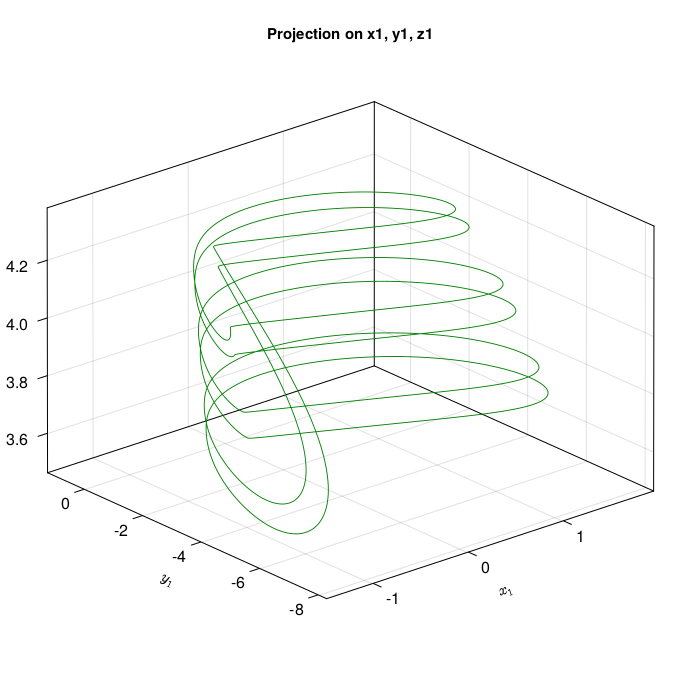

In [109]:
fig = Figure(resolution = (700, 700))
st, ed = 28000000, 28050000
ax = Axis3(fig[1,1]; xlabel = L"x_1", ylabel = L"y_1", zlabel = L"z_1", 
    title = "Projection on x1, y1, z1", titlesize = 15)

lines!(ax, data_neg[st:ed, 1], data_neg[st:ed, 2], data_neg[st:ed, 3], linewidth = 0.9, color = "green")

fig

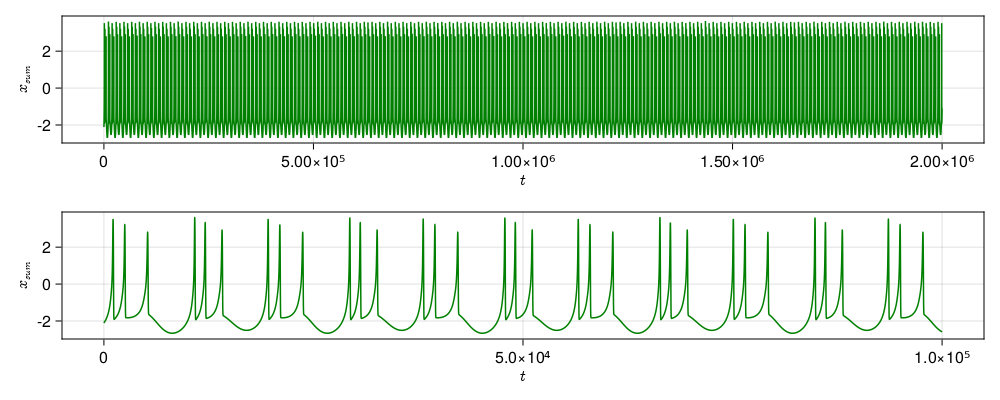

In [110]:
fig = Figure(resolution = (1000, 400))
st, ed = 28000000, 28100000
ax1 = Axis(fig[1,1]; xlabel = L"t", ylabel = L"x_{sum}")
lines!(ax1, (data_neg[st:end, 1] + data_neg[st:end, 4]), lw = 0.5, color = "green")
#hlines!(ax1, Hs2, lw = 2, color = "blue")

ax2 = Axis(fig[2,1]; xlabel = L"t", ylabel = L"x_{sum}")
lines!(ax2, (data_neg[st:ed, 1] + data_neg[st:ed, 4]), lw = 0.4, color = "green")
#hlines!(ax2, Hs2, lw = 2, color = "blue")

fig

### trajectory with  inital condition [0.01, 0.01, 0.01, 0.01, 0.01, 0.01]

In [52]:
 lyapunovspectrum(pos_synch, 300000.0;
                              diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,   maxiters = 10000000))

6-element Vector{Float64}:
  0.0977491392284058
  0.014980342122576767
  4.2529487946151073e-5
 -0.004371467224869967
 -8.80218287438301
 -8.827111147890268

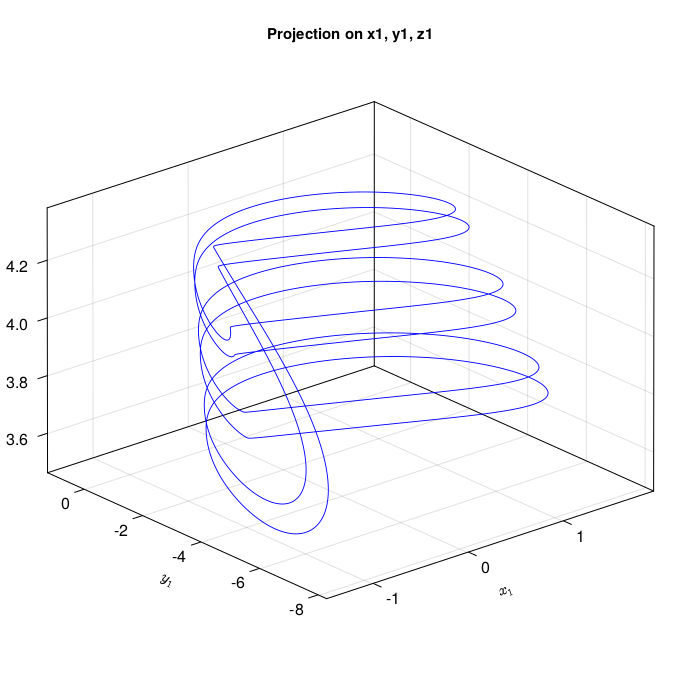

In [55]:
fig = Figure(resolution = (700, 700))
st, ed = 25000000, 25020000
ax = Axis3(fig[1,1]; xlabel = L"x_1", ylabel = L"y_1", zlabel = L"z_1", 
    title = "Projection on x1, y1, z1", titlesize = 15)

lines!(ax, data_pos[st:ed, 1], data_pos[st:ed, 2], data_pos[st:ed, 3], linewidth = 0.9, color = "blue")

fig

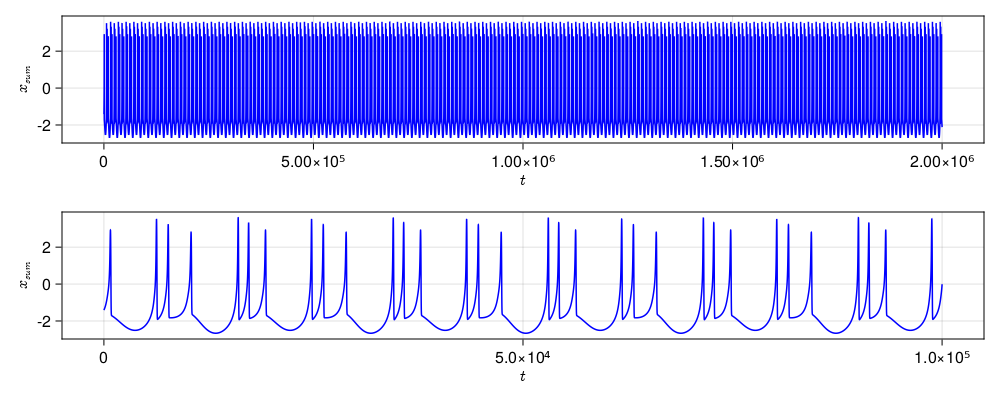

In [74]:
fig = Figure(resolution = (1000, 400))

st, ed = 28000000, 28100000

ax1 = Axis(fig[1,1]; xlabel = L"t", ylabel = L"x_{sum}")
lines!(ax1, (data_pos[st:end, 1] + data_pos[st:end, 4]), lw = 0.5, color = "blue")
# hlines!(ax1, Hs2, lw = 2, color = "blue")

ax2 = Axis(fig[2,1]; xlabel = L"t", ylabel = L"x_{sum}")
lines!(ax2, (data_pos[st:ed, 1] + data_pos[st:ed, 4]), lw = 0.4, color = "blue")
# hlines!(ax2, Hs2, lw = 2, color = "blue")

fig

### hyperchaos

In [103]:
 lyapunovspectrum(hyperchaos, 300000.0;
                              diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,   maxiters = 10000000))

6-element Vector{Float64}:
   0.014938286118498763
   0.005107729863063764
   2.0120840948555175e-6
  -0.027253681553004144
  -6.4098743477858395
 -11.551678286369572

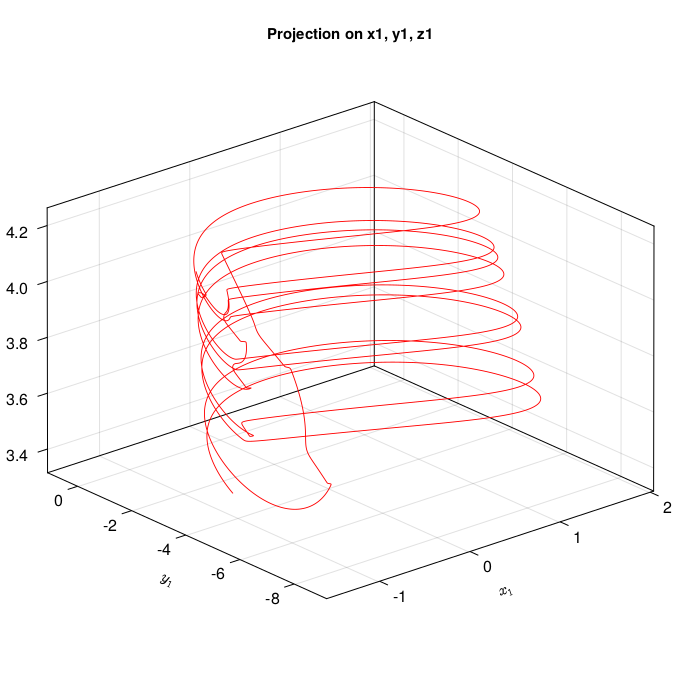

In [116]:
fig = Figure(resolution = (700, 700))
st, ed = 25000000, 25020000
ax = Axis3(fig[1,1]; xlabel = L"x_1", ylabel = L"y_1", zlabel = L"z_1", 
    title = "Projection on x1, y1, z1", titlesize = 15)

lines!(ax, data_hyperchaos[st:ed, 1], data_hyperchaos[st:ed, 2], data_hyperchaos[st:ed, 3], linewidth = 0.9, color = "red")


fig

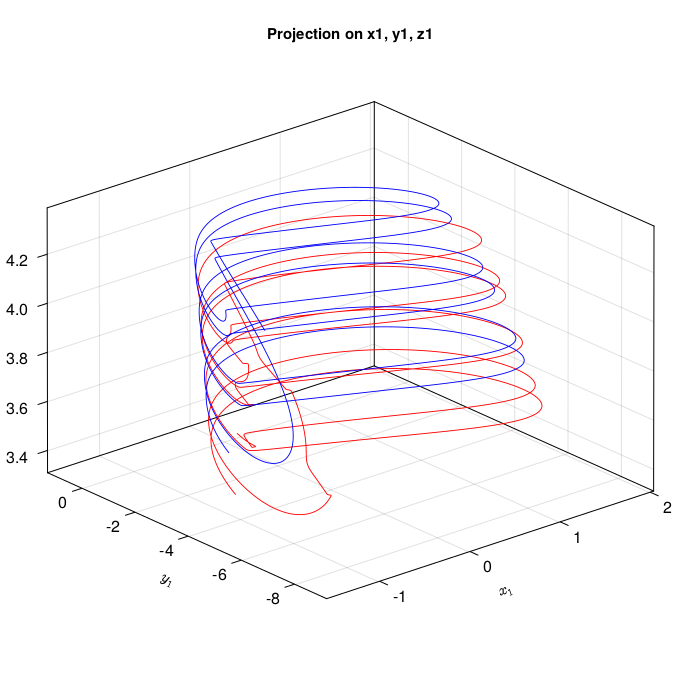

In [120]:
fig = Figure(resolution = (700, 700))
st, ed = 25000000, 25015000
ax = Axis3(fig[1,1]; xlabel = L"x_1", ylabel = L"y_1", zlabel = L"z_1", 
    title = "Projection on x1, y1, z1", titlesize = 15)

lines!(ax, data_hyperchaos[st:ed, 1], data_hyperchaos[st:ed, 2], data_hyperchaos[st:ed, 3], linewidth = 0.9, color = "red")
lines!(ax, data_pos[st:ed, 1], data_pos[st:ed, 2], data_pos[st:ed, 3], linewidth = 0.9, color = "blue")

fig


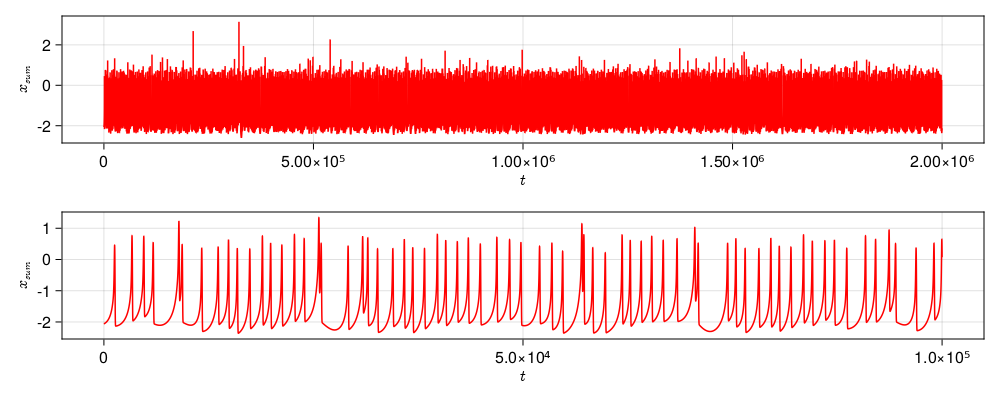

In [105]:
fig = Figure(resolution = (1000, 400))

st, ed = 28000000, 28100000

ax1 = Axis(fig[1,1]; xlabel = L"t", ylabel = L"x_{sum}")
lines!(ax1, (data_hyperchaos[st:end, 1] + data_hyperchaos[st:end, 4]), lw = 0.5, color = "red")
# hlines!(ax1, Hs2, lw = 2, color = "blue")

ax2 = Axis(fig[2,1]; xlabel = L"t", ylabel = L"x_{sum}")
lines!(ax2, (data_hyperchaos[st:ed, 1] + data_hyperchaos[st:ed, 4]), lw = 0.4, color = "red")
# hlines!(ax2, Hs2, lw = 2, color = "blue")

fig

### projection for blue trajectory

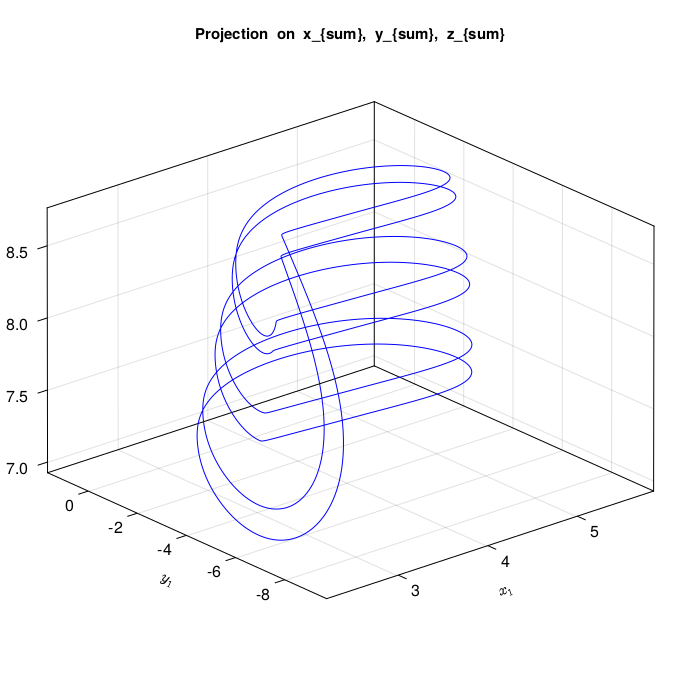

In [98]:
fig = Figure(resolution = (700, 700))
st, ed = 25000000, 25020000

ax = Axis3(fig[1,1]; xlabel = L"x_1", ylabel = L"y_1", zlabel = L"z_1",
            title = "Projection  on  x_{sum},  y_{sum},  z_{sum}", titlesize = 15)

lines!(ax, data_pos[st:ed, 1] + data_pos[st:ed, 3],
             data_pos[st:ed, 2] + data_pos[st:ed, 4],
             data_pos[st:ed, 3] + data_pos[st:ed, 6], linewidth = 1.0, color = "blue")

fig

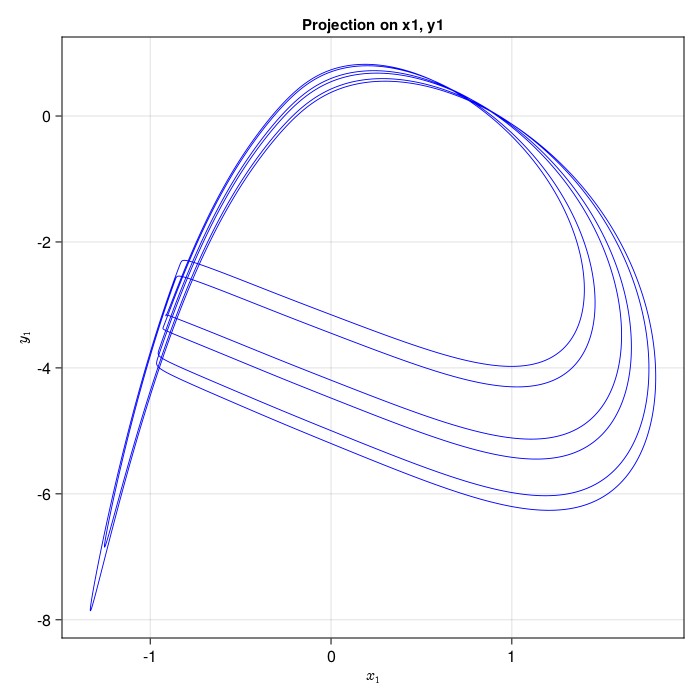

In [97]:
fig = Figure(resolution = (700, 700))

ax = Axis(fig[1,1]; xlabel = L"x_1", ylabel = L"y_1", title = "Projection on x1, y1", titlesize = 15)
lines!(ax, data_pos[st:ed, 1], data_pos[st:ed, 2], linewidth = 0.9, color = "blue")

fig

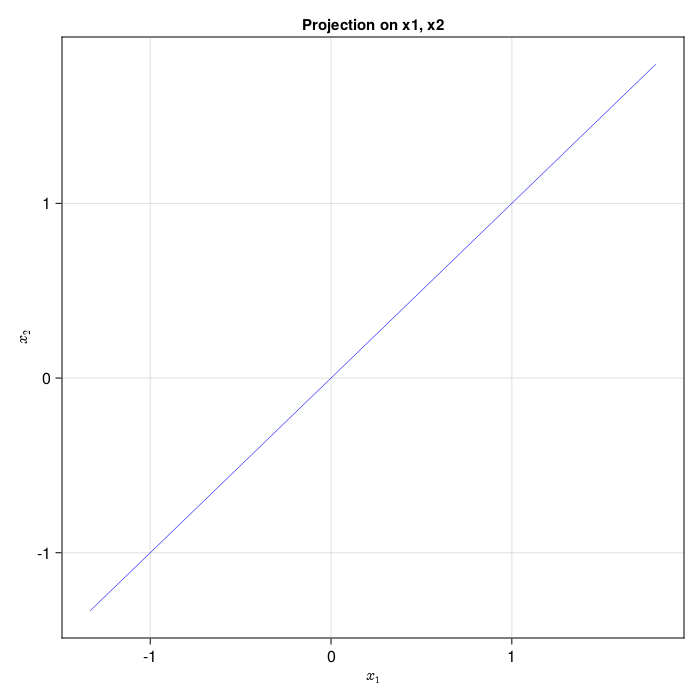

In [96]:
fig = Figure(resolution = (700, 700))

ax = Axis(fig[1,1]; xlabel = L"x_1", ylabel = L"x_2", title = "Projection on x1, x2", titlesize = 15)
lines!(ax, data_pos[st:ed, 1], data_pos[st:ed, 4], linewidth = 0.5, color = "blue")

fig

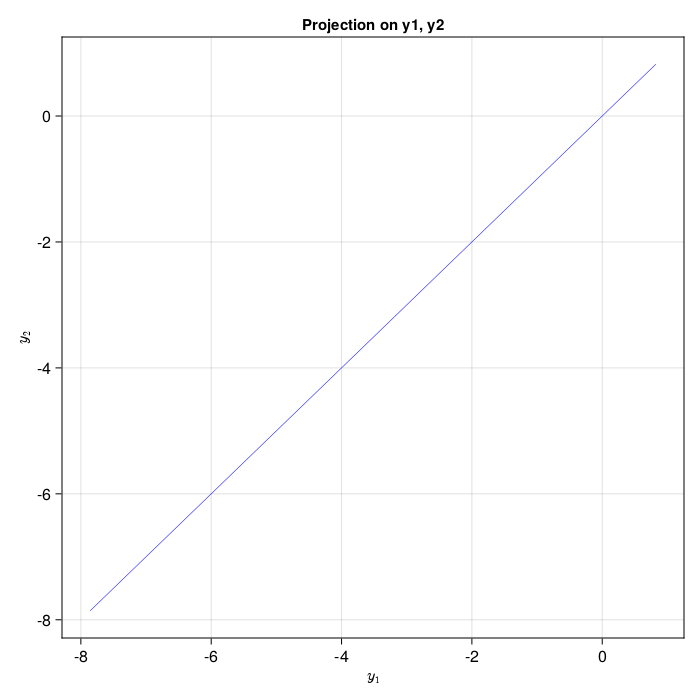

In [95]:
fig = Figure(resolution = (700, 700))

ax = Axis(fig[1,1]; xlabel = L"y_1", ylabel = L"y_2", title = "Projection on y1, y2", titlesize = 15)
lines!(ax, data_pos[st:ed, 2], data_pos[st:ed, 5], linewidth = 0.5, color = "blue")

fig

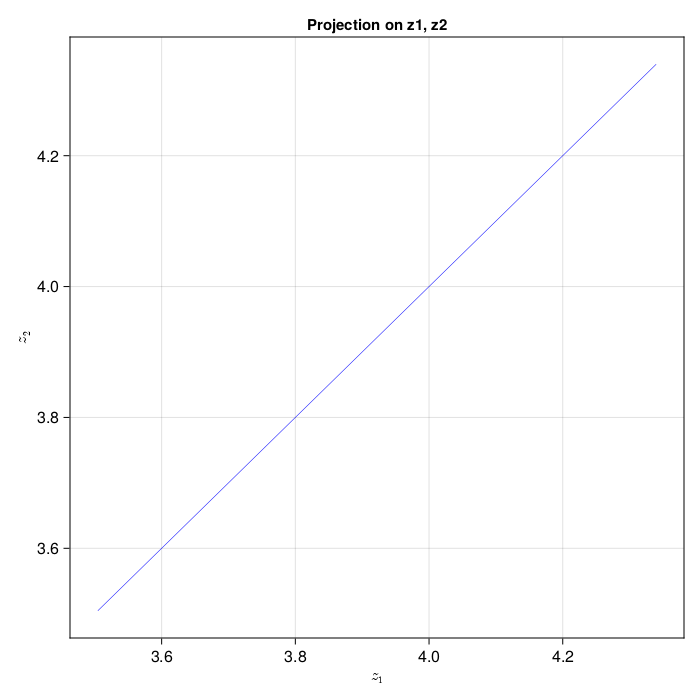

In [94]:
fig = Figure(resolution = (700, 700))

ax = Axis(fig[1,1]; xlabel = L"z_1", ylabel = L"z_2", title = "Projection on z1, z2", titlesize = 15)
lines!(ax, data_pos[st:ed, 3], data_pos[st:ed, 6], linewidth = 0.5, color = "blue")

fig

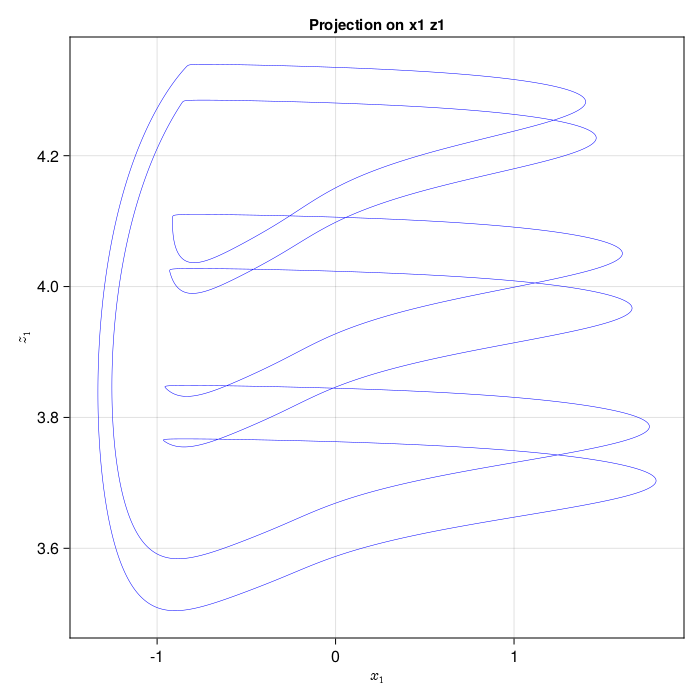

In [93]:
fig = Figure(resolution = (700, 700))

ax = Axis(fig[1,1]; xlabel = L"x_1", ylabel = L"z_1", title = "Projection on x1 z1", titlesize = 15)
lines!(ax, data_pos[st:ed, 1], data_pos[st:ed, 3], linewidth = 0.5, color = "blue")

fig

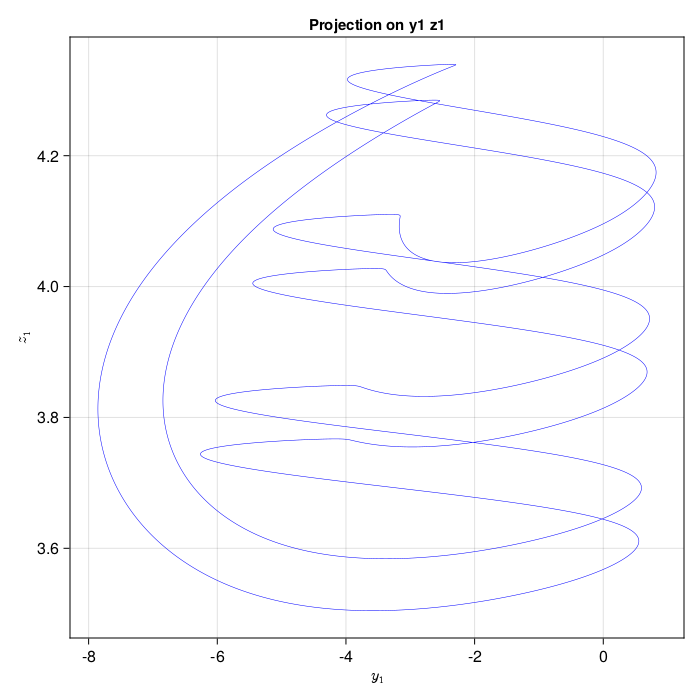

In [91]:
fig = Figure(resolution = (700, 700))

ax = Axis(fig[1,1]; xlabel = L"y_1", ylabel = L"z_1", title = "Projection on y1 z1", titlesize = 15)
lines!(ax, data_pos[st:ed, 2], data_pos[st:ed, 3], linewidth = 0.5, color = "blue")

fig

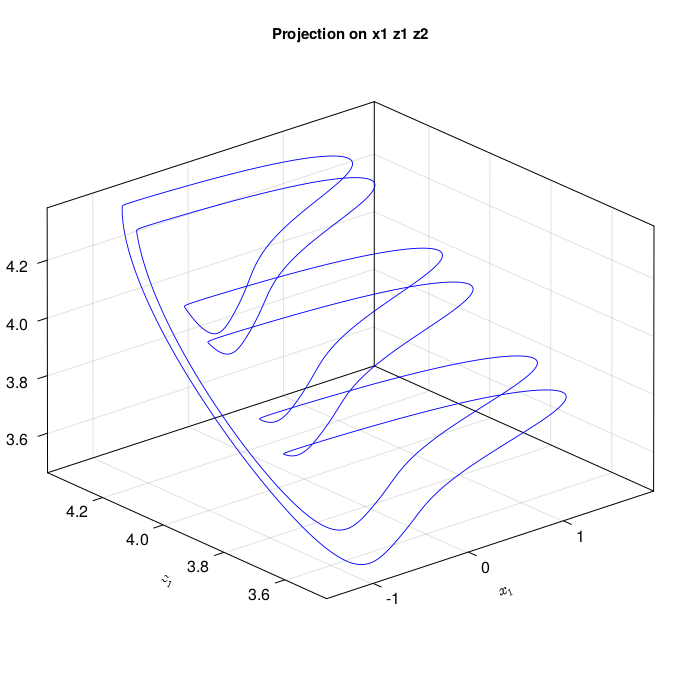

In [92]:
fig = Figure(resolution = (700, 700))

ax = Axis3(fig[1,1]; xlabel = L"x_1", ylabel = L"z_1", zlabel = L"z_2", title = "Projection on x1 z1 z2", titlesize = 15)
lines!(ax, data_pos[st:ed, 1], data_pos[st:ed, 3], data_pos[st:ed, 6], linewidth = 0.9, color = "blue")

fig

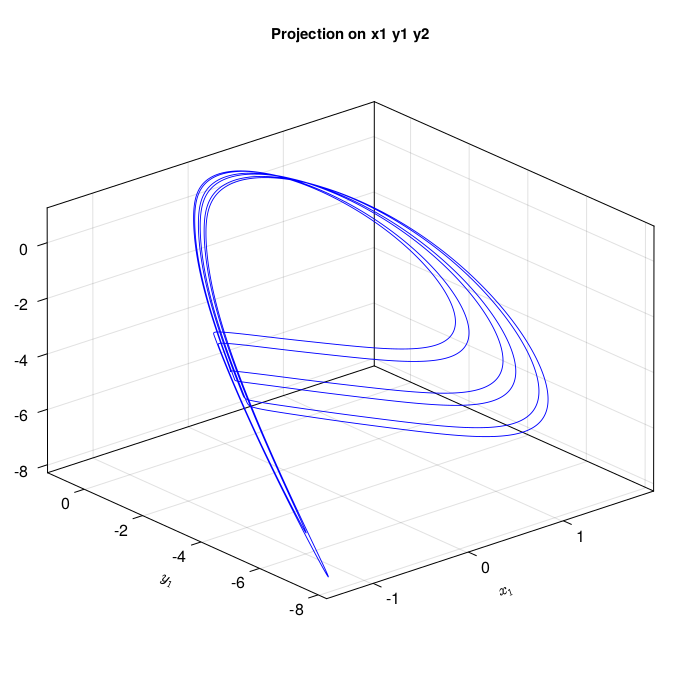

In [90]:
fig = Figure(resolution = (700, 700))

ax = Axis3(fig[1,1]; xlabel = L"x_1", ylabel = L"y_1", zlabel = L"y_2", title = "Projection on x1 y1 y2", titlesize = 15)
lines!(ax, data_pos[st:ed, 1], data_pos[st:ed, 2], data_pos[st:ed, 5], linewidth = 0.9, color = "blue")

fig

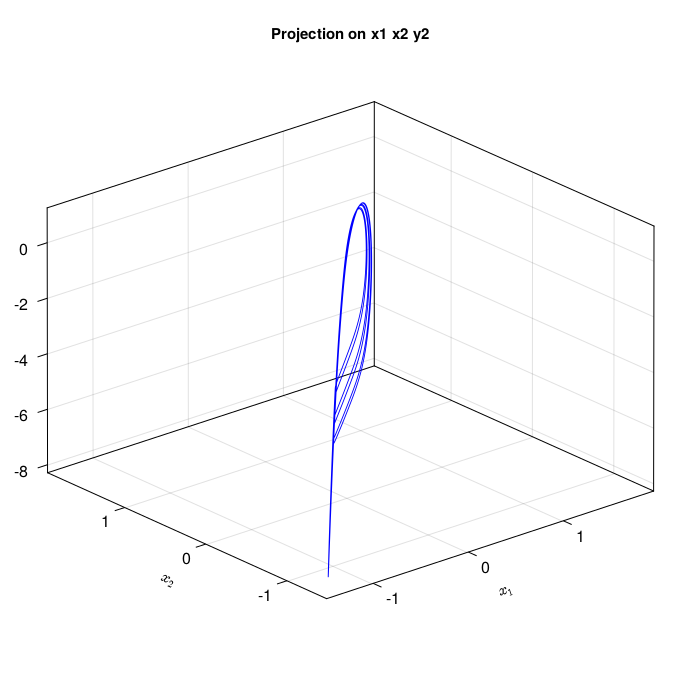

In [89]:
fig = Figure(resolution = (700, 700))

ax = Axis3(fig[1,1]; xlabel = L"x_1", ylabel = L"x_2", zlabel = L"y_2", title = "Projection on x1 x2 y2", titlesize = 15)
lines!(ax, data_pos[st:ed, 1], data_pos[st:ed, 4], data_pos[st:ed, 5], linewidth = 0.9, color = "blue")

fig

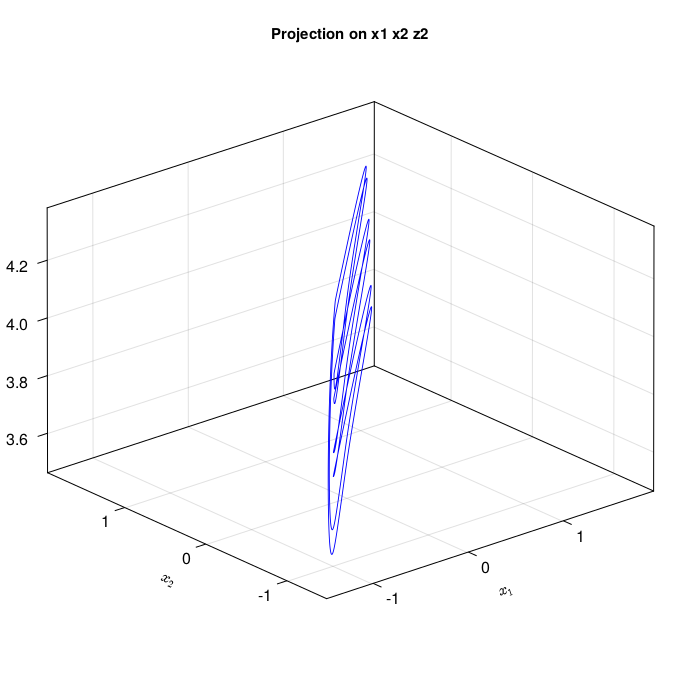

In [88]:
fig = Figure(resolution = (700, 700))

ax = Axis3(fig[1,1]; xlabel = L"x_1", ylabel = L"x_2", zlabel = L"z_2", title = "Projection on x1 x2 z2", titlesize = 15)
lines!(ax, data_pos[st:ed, 1], data_pos[st:ed, 4], data_pos[st:ed, 6], linewidth = 0.9, color = "blue")

fig

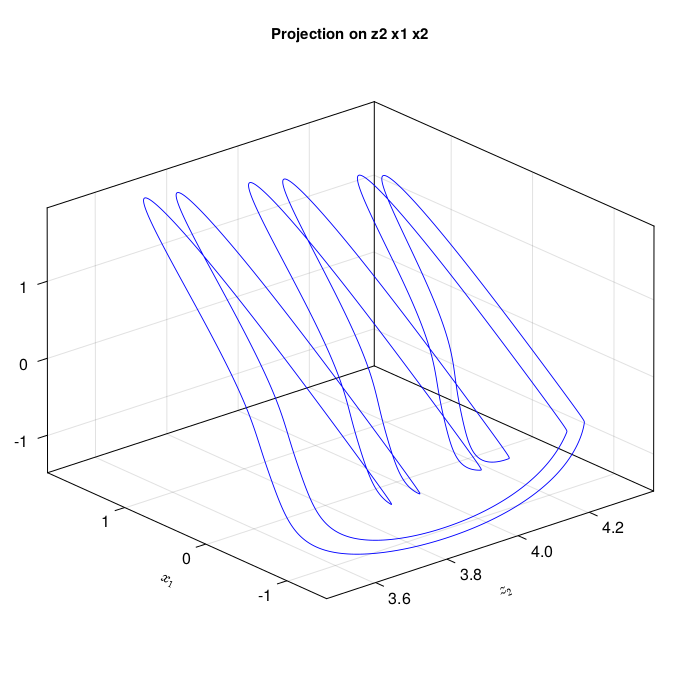

In [87]:
fig = Figure(resolution = (700, 700))

ax = Axis3(fig[1,1]; xlabel = L"z_2", ylabel = L"x_1", zlabel = L"x_2", title = "Projection on z2 x1 x2", titlesize = 15)
lines!(ax, data_pos[st:ed, 6], data_pos[st:ed, 1], data_pos[st:ed, 4], linewidth = 0.9, color = "blue")

fig

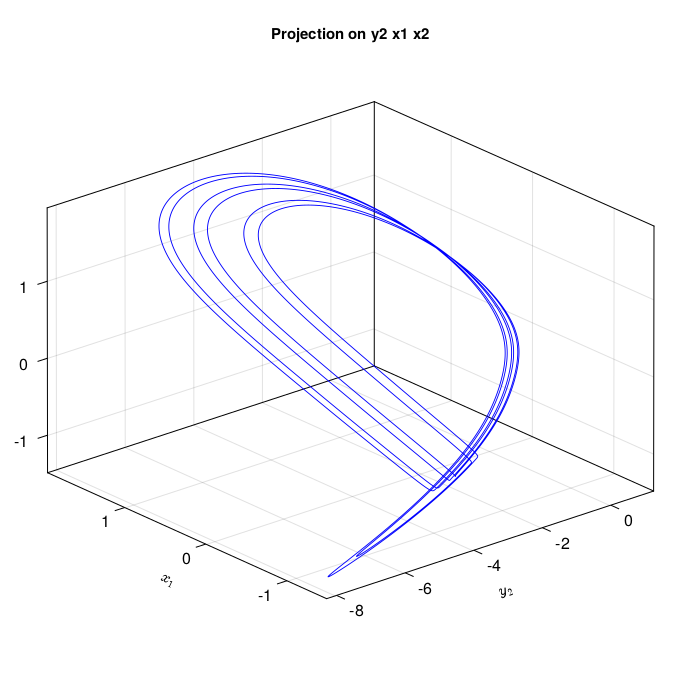

In [86]:
fig = Figure(resolution = (700, 700))

ax = Axis3(fig[1,1]; xlabel = L"y_2", ylabel = L"x_1", zlabel = L"x_2", title = "Projection on y2 x1 x2", titlesize = 15)
lines!(ax, data_pos[st:ed, 5], data_pos[st:ed, 1], data_pos[st:ed, 4], linewidth = 0.9, color = "blue")

fig

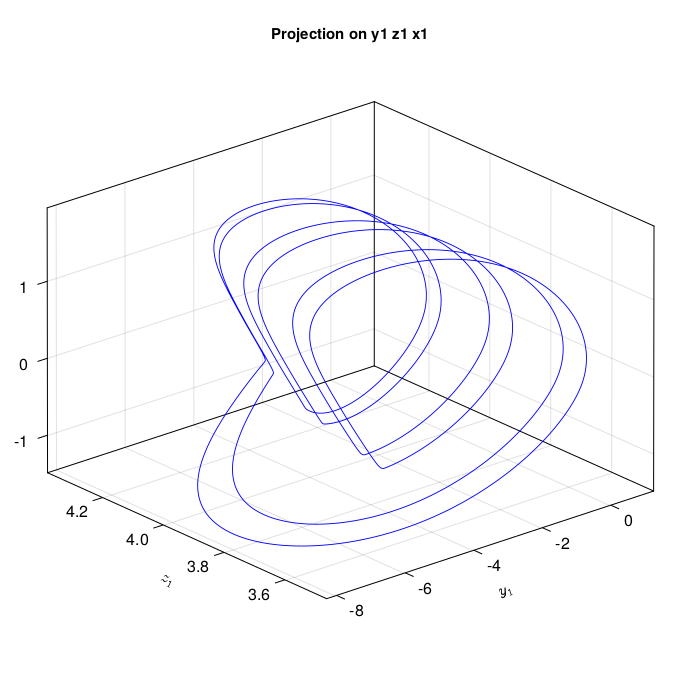

In [85]:
fig = Figure(resolution = (700, 700))

ax = Axis3(fig[1,1]; xlabel = L"y_1", ylabel = L"z_1", zlabel = L"x_1", title = "Projection on y1 z1 x1", titlesize = 15)
lines!(ax, data_pos[st:ed, 2], data_pos[st:ed, 3], data_pos[st:ed, 1], linewidth = 0.9, color = "blue")

fig

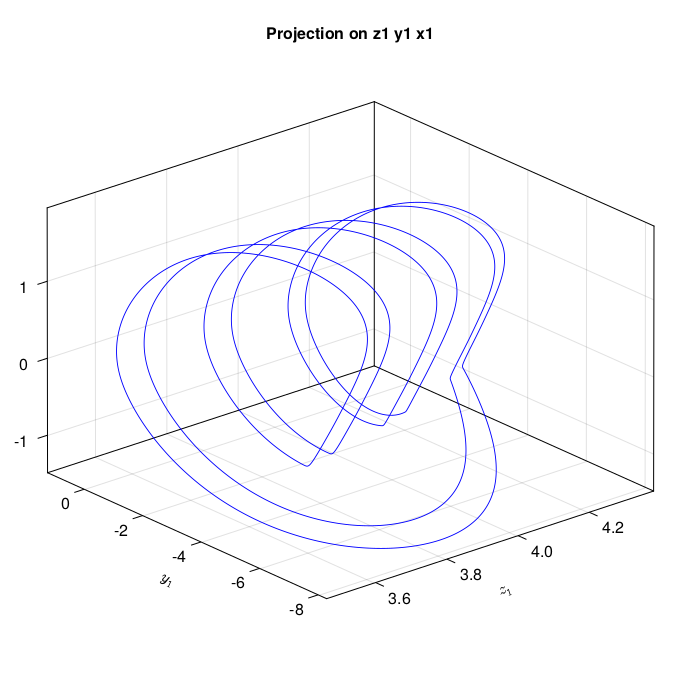

In [84]:
fig = Figure(resolution = (700, 700))

ax = Axis3(fig[1,1]; xlabel = L"z_1", ylabel = L"y_1", zlabel = L"x_1", title = "Projection on z1 y1 x1")
lines!(ax, data_pos[st:ed, 3], data_pos[st:ed, 2], data_pos[st:ed, 1], linewidth  = 0.9, color = "blue")

fig

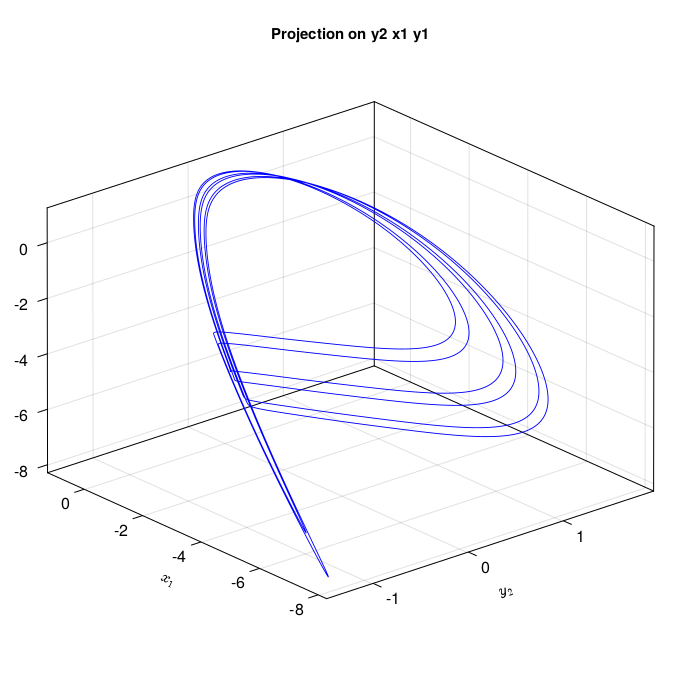

In [83]:
fig = Figure(resolution = (700, 700))

st, ed = 25000000, 25050000

ax = Axis3(fig[1,1]; xlabel = L"y_2", ylabel = L"x_1", zlabel = L"y_1", title = "Projection on y2 x1 y1", titlesize = 15)

lines!(ax, data_pos[st:ed, 1], data_pos[st:ed, 5], data_pos[st:ed, 2], linewidth = 0.9, color = "blue")

fig

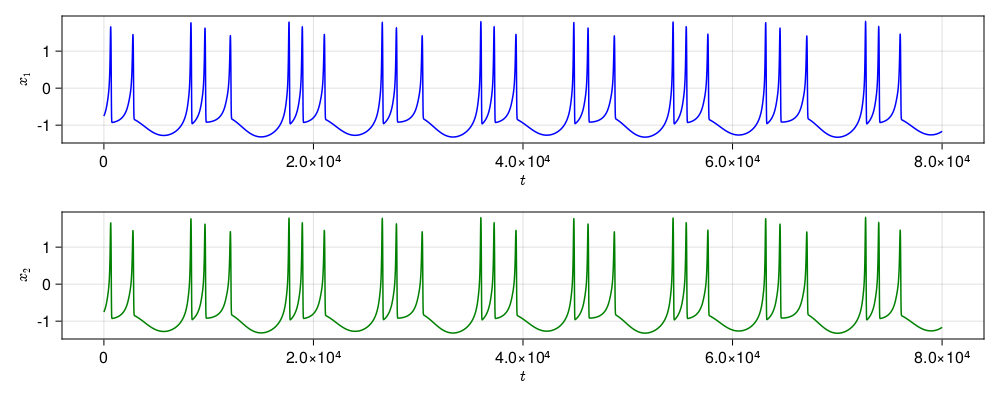

In [77]:
fig = Figure(resolution = (1000, 400))

ax1 = Axis(fig[1,1]; xlabel = L"t", ylabel = L"x_{1}")
ax2 = Axis(fig[2,1]; xlabel = L"t", ylabel = L"x_{2}")

lines!(ax1, data_pos[120000:200000, 1], lw = 0.5, color = "blue")
lines!(ax2, data_pos[120000:200000, 4], lw = 0.5, color = "green")

fig

## Interactive

In [44]:
a = 1.0; b = 3.0; c = 1.0; d = 5.0;
xr = -1.6; r = 0.01; s = 5.0; I = 4.0; xv = 2.0;
k1= -0.17; k2 = -0.17;
k = 0.0

p = [a, b, c, d, s, xr, r, I, xv, k1, k2, k]
hyperchaos = ContinuousDynamicalSystem(HR,  condition3, p );

In [45]:
diffeq = (alg = Vern9(), abstol = 1e-11, reltol = 1e-11,   maxiters = 10000000)

condition1 = [0.01, 0.01, 0.01, 0.01, 0.01, 0.01]
condition3 = [0.010001, 0.01, 0.01, 0.01, 0.01, 0.01]

u0s = [condition1]

1-element Vector{Vector{Float64}}:
 [0.01, 0.01, 0.01, 0.01, 0.01, 0.01]

In [46]:
ps = Dict(
    10 => -0.5:0.001:0.5,
    11 => -0.5:0.001:0.5,
    12 => 0:0.001:1,
)
pnames = Dict(10 => "k1", 11 => "k2", 12 => "k")

Dict{Int64, String} with 3 entries:
  11 => "k2"
  10 => "k1"
  12 => "k"

In [47]:
lims = (
    (-3, 3),
    (-8, 4),
    (0, 5),
)

((-3, 3), (-8, 4), (0, 5))

In [53]:
fig, obs, step  = interactive_evolution(
    hyperchaos, u0s; idxs = [3,2, 1], tsidxs  = nothing, tail = 20000, diffeq
)
# ps = ps, pnames = pnames
axss = content(fig[1,1][1,1])
axss.xlabel = "x1"
axss.ylabel = "y1"
axss.zlabel = "z1"



"z1"

In [43]:
hyperchaos = ContinuousDynamicalSystem(HR,  condition3, p );

diffeq = (alg = Vern9(), abstol = 1e-11, reltol = 1e-11,   maxiters = 10000000)

condition1 = [0.01, 0.01, 0.01, 0.01, 0.01, 0.01]
condition3 = [0.010001, 0.01, 0.01, 0.01, 0.01, 0.01]

u0s = [condition1]

trs = [trajectory(hyperchaos, 10000, u0; diffeq)[:, SVector(2,3,1)] for u0 ∈ u0s]

for i in 2:length(u0s)
    append!(trs[1], trs[i])
end

# Inputs:
j = 2 # the dimension of the plane
tr = trs[1]

brainscan_poincaresos(tr, j; linekw = (transparency = true,))

(Scene (1600px, 800px):
  0 Plots
  3 Child Scenes:
    ├ Scene (1600px, 800px)
    ├ Scene (1600px, 800px)
    └ Scene (1600px, 800px), Axis3(), Axis (2 plots))